# View  PostISRCCD  in OGA

 work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/04/19
- last update : 2023/04/19

- Spectractor https://github.com/lsst/Spectractor/
- Spectractor Version 2.4
- branch lsst-dev
- available in version w_2023_11 by default


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_11/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup


In [2]:
! eups list -s lsst_distrib

   gdf42428520+c82c1836b5 	current w_2023_11 setup


In [3]:
import h5py

In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

import matplotlib.patches as patches

import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams.update({'figure.max_open_warning': 0})

In [6]:
import seaborn as sns
hls_colors = sns.color_palette("hls", 6)

In [7]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [8]:
from astropy.time import Time
import astropy.units as u

In [9]:
import re

## Config

### Butler

In [10]:
#repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
repo = "/repo/embargo/"
butler = dafButler.Butler(repo)
registry = butler.registry

### Date & Filter & Disperser & collection

- make your choice

In [11]:
DateToRuncollection = {
    
    
 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
    
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
    
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice, all good
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very very bad spectra, run not selected
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  very nice spectra, all good
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra, all good
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # mount errors, nice spectra, few bad labelled as good 
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra, few bad labelled as good, versy strange
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48", # No mount error, nice spectra
 20221208 :  "u/dagoret/BPS_manyspectro_v49", # No mount error, nice spectra, one bad labelled as good
 20221209 :  "u/dagoret/BPS_manyspectro_v50", # No mount error, spectra at distance from optical center, very interesting
 20221210 :  "u/dagoret/BPS_manyspectro_v51", # No mount error, bof
 20221212 :  "u/dagoret/BPS_manyspectro_v52", # No mount error, very bad gains and instability 
    
 #January 2023 
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors, some mucol spectra that looks good are rejected on DCCD
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount error, some mucol looking good are rejected, many bad centroid calculation
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # no mount errors, many blurred spectra probably due to strong tracking error
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment

 #february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42", # no mount errors, nothing special
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors, OK
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors, OK, nice spectra 
 20230228 :  "u/dagoret/BPS_manyspectro_v70", # No mount error,OK nice spectra
    
 #march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", # no mount errors, OK many spectra
 20230302 :  "u/dagoret/BPS_manyspectro_v72", # no mount error, sometime bad subtraction of order2 on HD38666 (mucol) 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors 
    
}

In [12]:
DATE = 20221212
my_collection = DateToRuncollection[DATE]

filterdispersername = "empty~holo4_003"


RUNSELECTION = 20230403

# List of Dataset types avalaible in my collection

## List of dataset types

In [13]:
list(registry.queryDatasetTypes("*spec*"))

[DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict),
 DatasetType('spectraction', {band, instrument, detector, physical_filter, visit}, Spectraction),
 DatasetType('spectractorImage', {band, instrument, detector, physical_filter, visit}, SpectractorImage),
 DatasetType('spectractorSpectrum', {band, instrument, detector, physical_filter, visit}, SpectractorSpectrum)]

## list of datasets

In [14]:
list(registry.queryDatasets("*spec*", collections=[my_collection]))[:10]

[DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022121200397, ...}, id=7e69a147-62d1-4497-b2a1-be0bd2937b25, run='u/dagoret/BPS_manyspectro_v52/20230313T153822Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022121200419, ...}, id=e70d552c-6bff-4ae5-83f9-b6867a36c0e5, run='u/dagoret/BPS_manyspectro_v52/20230313T153822Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022121200418, ...}, id=a33a3e17-85ea-4927-a84d-503934b00ee2, run='u/dagoret/BPS_manyspectro_v52/20230313T153822Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2

### Spectractor

In [15]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

### The collection

In [16]:
datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where= "instrument='LATISS'")

## Loop on exposures

In [17]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers
  

for i, ref in enumerate(datasetRefs):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    
    #through old runs
    date_of_run = int(ref.run.split("/")[-1].split("T")[0])
    #if date_of_run< RUNSELECTION :
    #    continue
 
    
    
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
 
    spec = butler.get('spectractorSpectrum', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    

============= (0) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022121200399}
visit...................: 2022121200399
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v52/20230313T153822Z
{'day_obs': 20221212, 'seq_num': 399, 'detector': 0}
============= (1) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022121200411}
visit...................: 2022121200411
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v52/20230313T153822Z
{'day_obs': 20221212, 'seq_num': 411, 'detector': 0}
============= (2) ============datasetType = sp

In [18]:
all_dataId

[{'day_obs': 20221212, 'seq_num': 399, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 411, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 406, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 425, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 398, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 407, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 418, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 408, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 416, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 395, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 400, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 417, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 415, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 409, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 426, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 394, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 413, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 414, 'detector': 0},
 {'day_obs

In [19]:
all_numbers = [395,398,406]

In [20]:
dataid1 = {'day_obs': 20221212, 'seq_num': 395, 'detector': 0}
dataid2 = {'day_obs': 20221212, 'seq_num': 398, 'detector': 0}
dataid3 = {'day_obs': 20221212, 'seq_num': 406, 'detector': 0}

In [21]:
all_dataid = [dataid1,dataid2,dataid3]

In [22]:
all_postisrccd = []

for dataid in all_dataid: 
    postisrccd = butler.get('postISRCCD', dataId = dataid, detector=0, collections=my_collection, instrument='LATISS')
    all_postisrccd.append(postisrccd)

In [23]:
rect1 = patches.Rectangle((2360,0), 90, 2700, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((2100,0), 90, 2700, linewidth=1, edgecolor='b', facecolor='none')

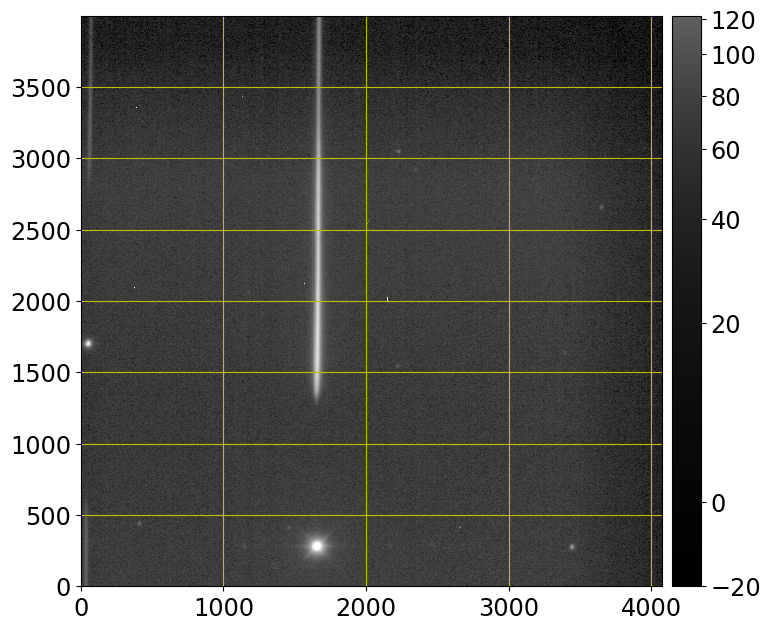

In [24]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(all_postisrccd[2].image)
#plt.gca().axis('off')
plt.grid(color="y")

In [25]:
sizey,sizex=all_postisrccd[0].getImage().array.shape

In [26]:
#transform = AsinhStretch() + PercentileInterval(99.)
transform = PercentileInterval(95.)

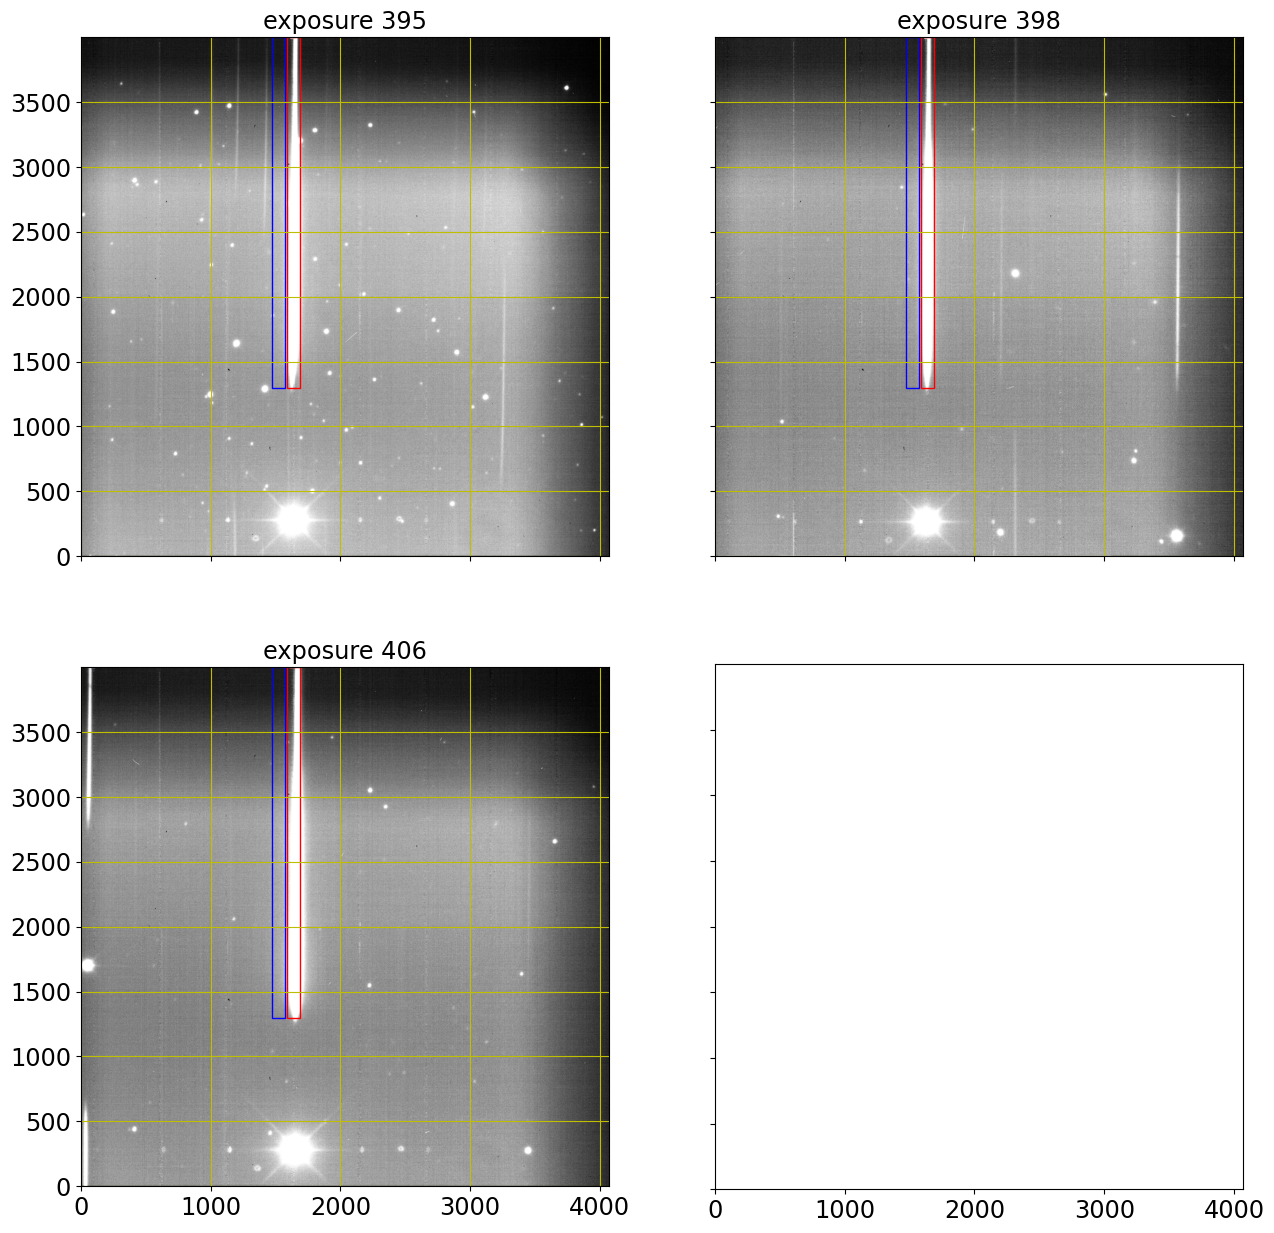

In [27]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(15, 15), sharex=True, sharey=True)
for idx, ax in enumerate(axes.flat):
    if idx>=3:
        break
    ax.imshow(transform(all_postisrccd[idx].getImage().array),origin="lower",cmap='gray')
    ax.grid(color="y")
    rect1 = patches.Rectangle((sizex-2500+20,sizey-2700), 100, 2700, linewidth=1, edgecolor='r', facecolor='none')
    rect2 = patches.Rectangle((sizex-2600,sizey-2700), 100, 2700, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    num=all_numbers[idx]
    title =f"exposure {num}"
    ax.set_title(title)

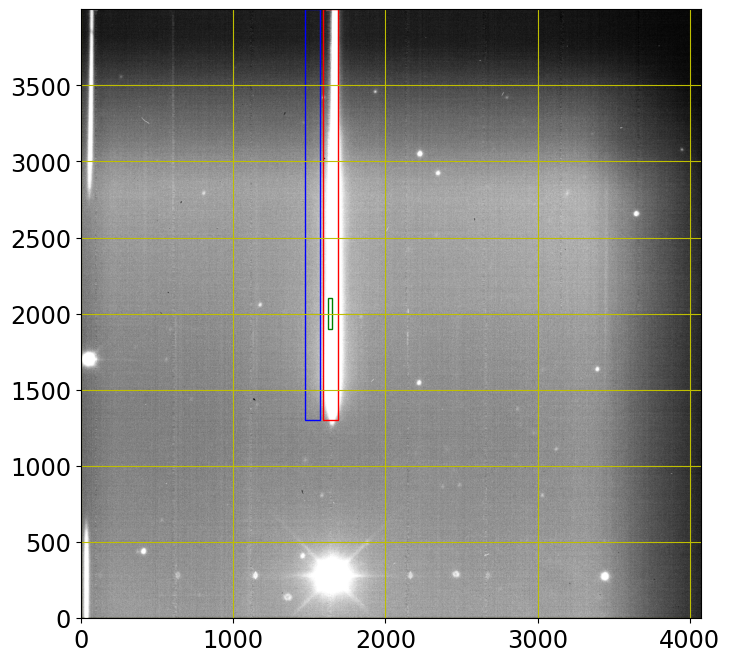

In [28]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.imshow(transform(all_postisrccd[2].getImage().array),origin="lower",cmap='gray')
ax.grid(color="y")
rect1 = patches.Rectangle((sizex-2500+20,sizey-2700), 100, 2700, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((sizex-2600,sizey-2700), 100, 2700, linewidth=1, edgecolor='b', facecolor='none')
rect3 = patches.Rectangle((sizex-2500+50,sizey//2-100), 30,200, linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
#ax.set_title(all_exposures[idx])
plt.show()


In [29]:
all_spectrum2D = []
all_background2D = []

for idx in range(3):
    the_fitsimage = all_postisrccd[idx].image.array
    spectrum2D = the_fitsimage[sizey-2700-1:sizey-1,sizex-2500+20:sizex-2500+100+20]
    background2D = the_fitsimage[sizey-2700-1:sizey-1,sizex-2600:sizex-2600+100]
    all_spectrum2D.append(spectrum2D)
    all_background2D.append(background2D)

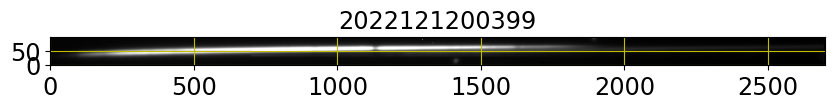

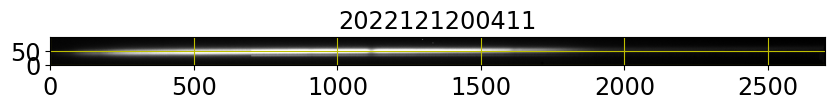

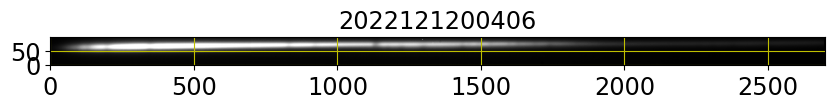

In [30]:
for idx in range(3):
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(1,1,1)
    ax.imshow(transform(all_spectrum2D[idx].T),origin="lower",cmap='gray')
    ax.grid(color="y")
    ax.set_title(all_exposures[idx])
    plt.show()

In [31]:
all_spectrum1D = []
all_background1D = []

for idx in range(3):

    spectrum1D = all_spectrum2D[idx].sum(axis=1)
    background1D = all_background2D[idx].sum(axis=1)
    
    all_spectrum1D.append(spectrum1D) 
    all_background1D.append(background1D)

Text(0.5, 1.0, '2022/12/12')

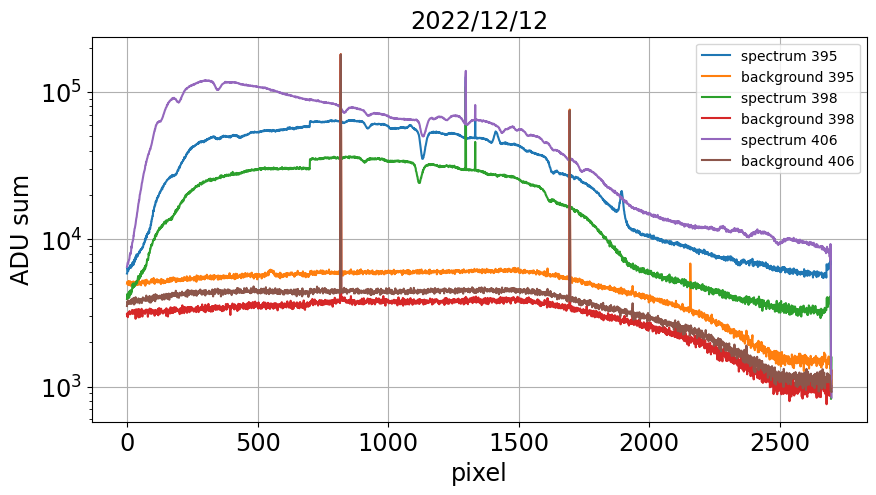

In [32]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
for idx in range(3):
    num = all_numbers[idx]
    label_spec = f"spectrum {num}"
    label_bg = f"background {num}"
    ax.plot(all_spectrum1D[idx],label=label_spec)
    ax.plot(all_background1D[idx], label=label_bg)
ax.set_yscale('log')
#ax.invert_xaxis()
ax.grid()
ax.set_xlabel("pixel")
ax.set_ylabel("ADU sum")
ax.legend()
ax.set_title("2022/12/12")

Text(0.5, 1.0, '2022/12/12')

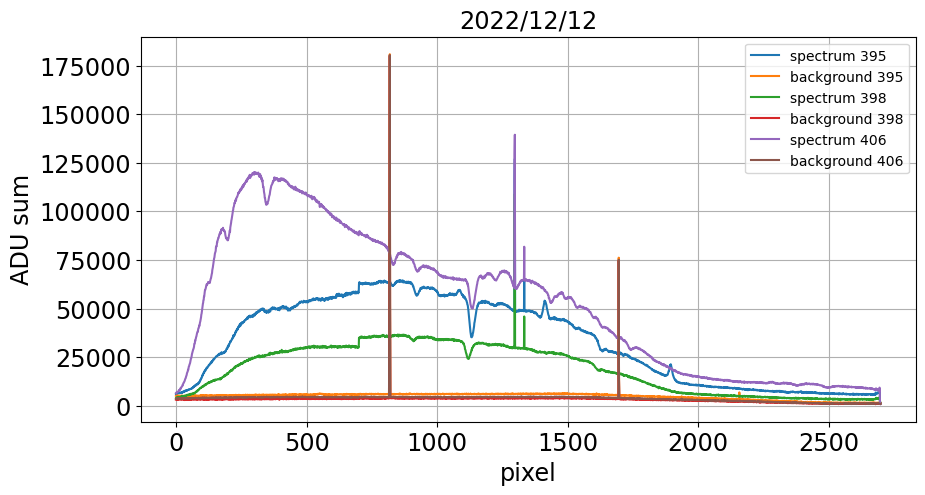

In [33]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
for idx in range(3):
    num = all_numbers[idx]
    label_spec = f"spectrum {num}"
    label_bg = f"background {num}"
    ax.plot(all_spectrum1D[idx],label=label_spec)
    ax.plot(all_background1D[idx], label=label_bg)
#ax.set_yscale('log')
#ax.invert_xaxis()
ax.grid()
ax.set_xlabel("pixel")
ax.set_ylabel("ADU sum")
ax.legend()
ax.set_title("2022/12/12")

# Scan in slice

In [390]:
selected_spectrum_idx = 2

In [391]:
the_img = all_postisrccd[selected_spectrum_idx]
dataid_selected = all_dataid[selected_spectrum_idx]
exposure_selected = dataid_selected['day_obs']*100000+dataid_selected['seq_num']

In [392]:
dataid_selected

{'day_obs': 20221212, 'seq_num': 406, 'detector': 0}

In [393]:
all_img = []
all_nameimg = []

for ampIdx, amp in enumerate(the_img.getDetector()):
    ampName = amp.getName()
    all_nameimg.append(ampName)
    
    # This can work only on postISRCCD
    ampExp = the_img.Factory(the_img, amp.getBBox())
    all_img.append(ampExp.image) 
    #fig = plt.figure(figsize=(5,10))
    #afw_display = afwDisplay.Display(frame=fig)
    #afw_display.scale('linear', 'zscale',None)
    #title = f"exposure : {exposure_selected}, ampl = {ampName}"
    #afw_display.mtv(ampExp.image,title=title)

In [394]:
print(all_nameimg)

['C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C07', 'C06', 'C05', 'C04', 'C03', 'C02', 'C01', 'C00']


In [395]:
idx_C13  = 3

In [396]:
idx_C03 = 12

In [397]:
mapampid = [0,1,2,3,4,5,6,7,15,14,13,12,11,10,9,8]

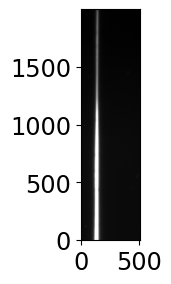

In [398]:
im = plt.imshow(transform(all_img[idx_C13 ].getArray()),origin='lower',cmap="gray")
clim=im.properties()['clim']

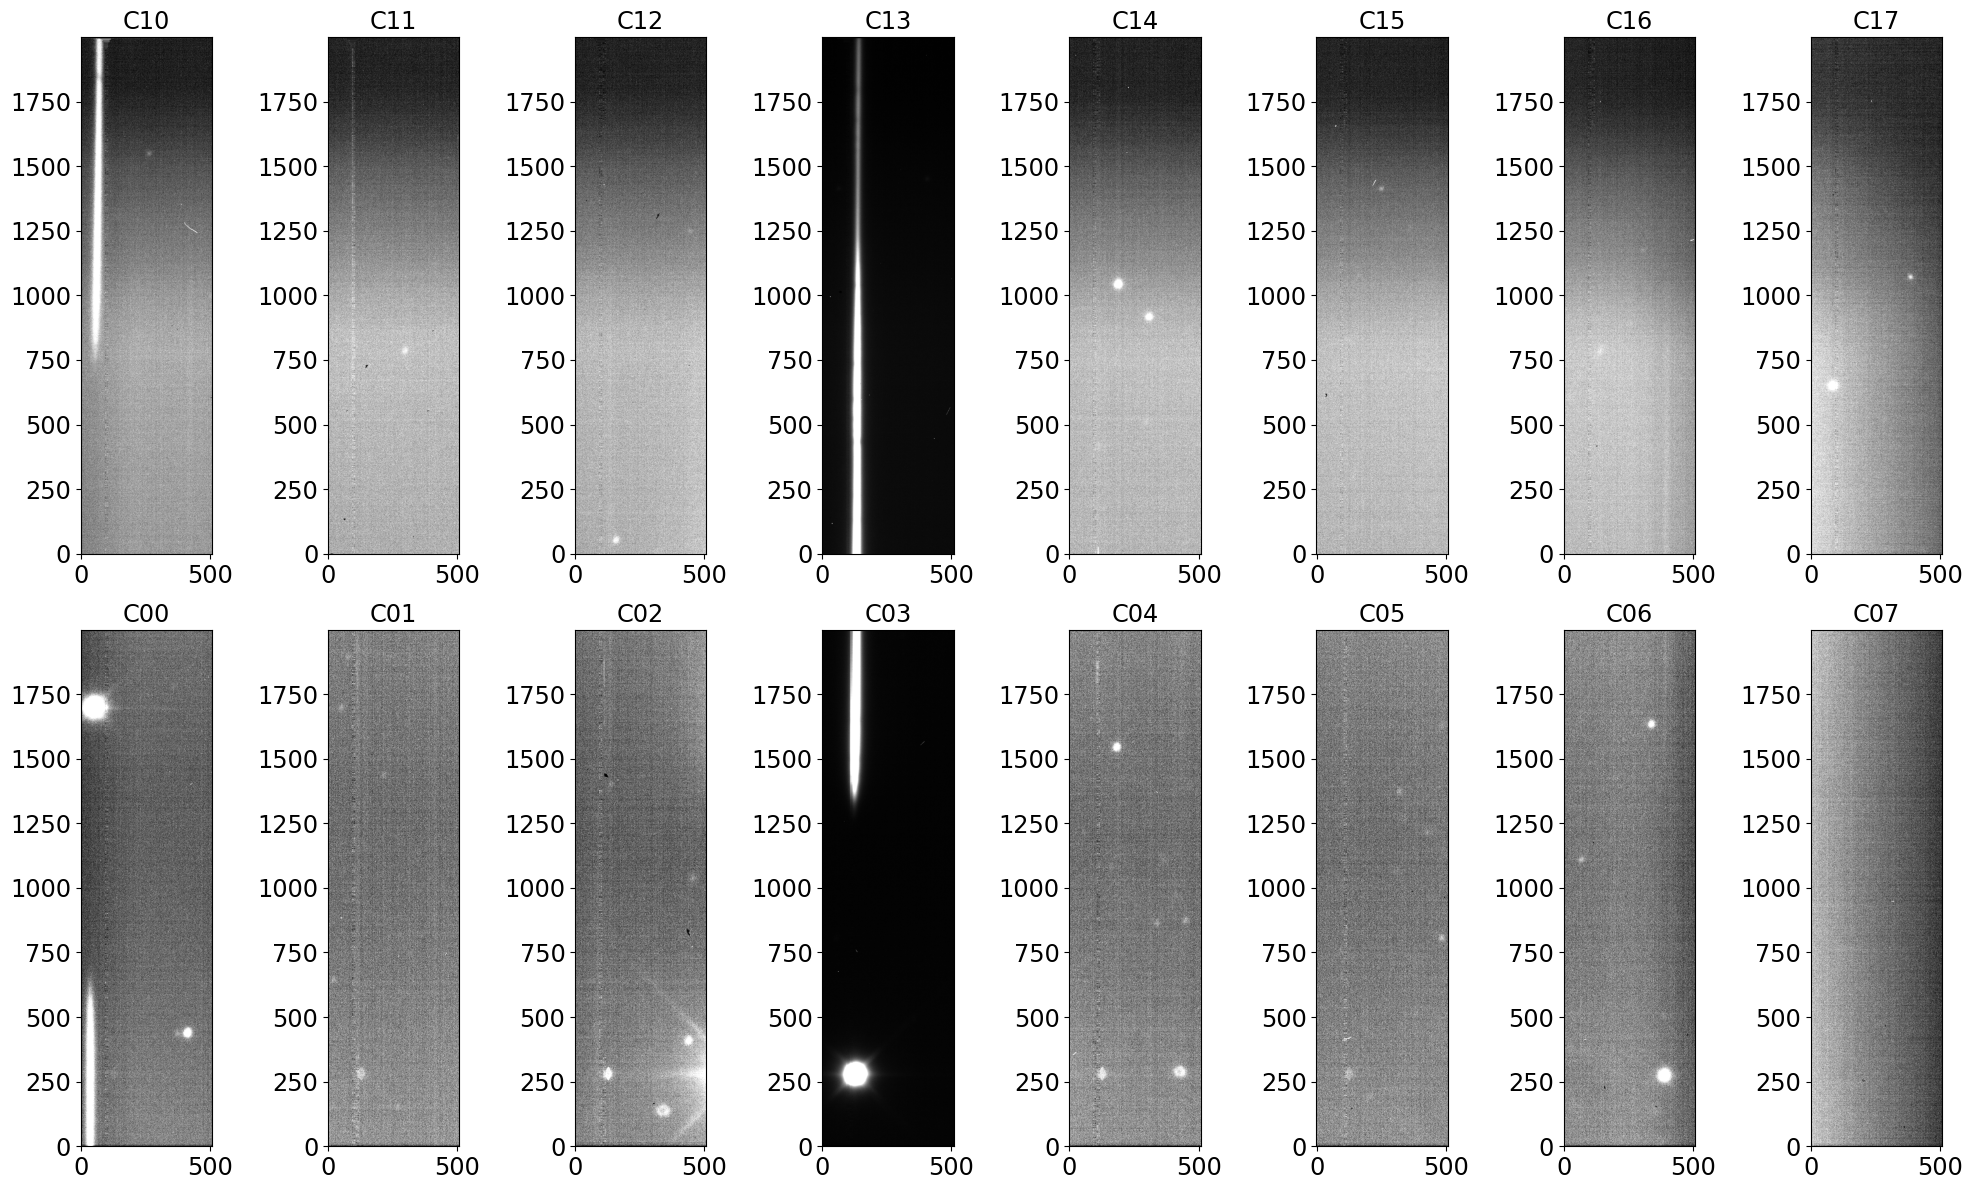

In [399]:
fig=plt.figure(figsize=(20,12))
all_ImgAmp = []
for idx in range(16):
    ax=fig.add_subplot(2,8,mapampid[idx]+1)
    im = ax.imshow(transform(all_img[idx].getArray()),origin='lower',cmap="gray",clim=clim)
    all_ImgAmp.append(im)
    ax.set_title(all_nameimg[idx])
    

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5)
plt.tight_layout()

In [400]:
stiched = np.concatenate((all_img[idx_C03].getArray(), all_img[idx_C13].getArray()), axis=0)

In [401]:
sizey,sizex= stiched.shape

In [402]:
sizex

509

In [403]:
sizey

4000

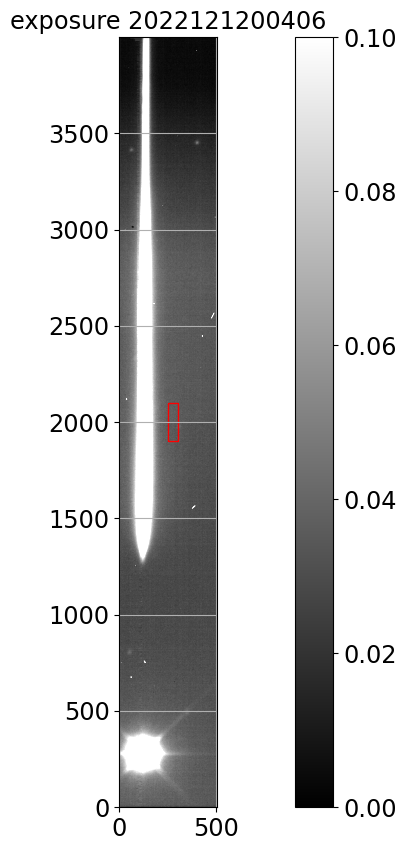

In [404]:
binwx= 50
binwy= 200
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
im = ax.imshow(transform(stiched),origin='lower',cmap="gray",vmin=0,vmax=0.1)
rect = patches.Rectangle((sizex//2,sizey//2-binwy//2), binwx, binwy, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# values off the colorbar.
cbar = fig.colorbar(im,ax=ax)
title = f"exposure {exposure_selected}"
ax.set_title(title)
ax.grid()
plt.show()

In [405]:
nsteps = sizex//binwx
nsteps

10

In [406]:
all_patches = []
all_projections = []
for istep in range(nsteps):
    the_patch = stiched[sizey//2-binwy//2:sizey//2+binwy//2,istep*binwx:(istep+1)*binwx]
    projection = np.average(the_patch,axis=1)
    all_patches.append(the_patch)
    all_projections.append(projection)
    

In [407]:
hls_colors = sns.color_palette("hls", nsteps)

In [408]:
ncols=5
nrows = int(np.ceil(nsteps/ncols))
nrows

2

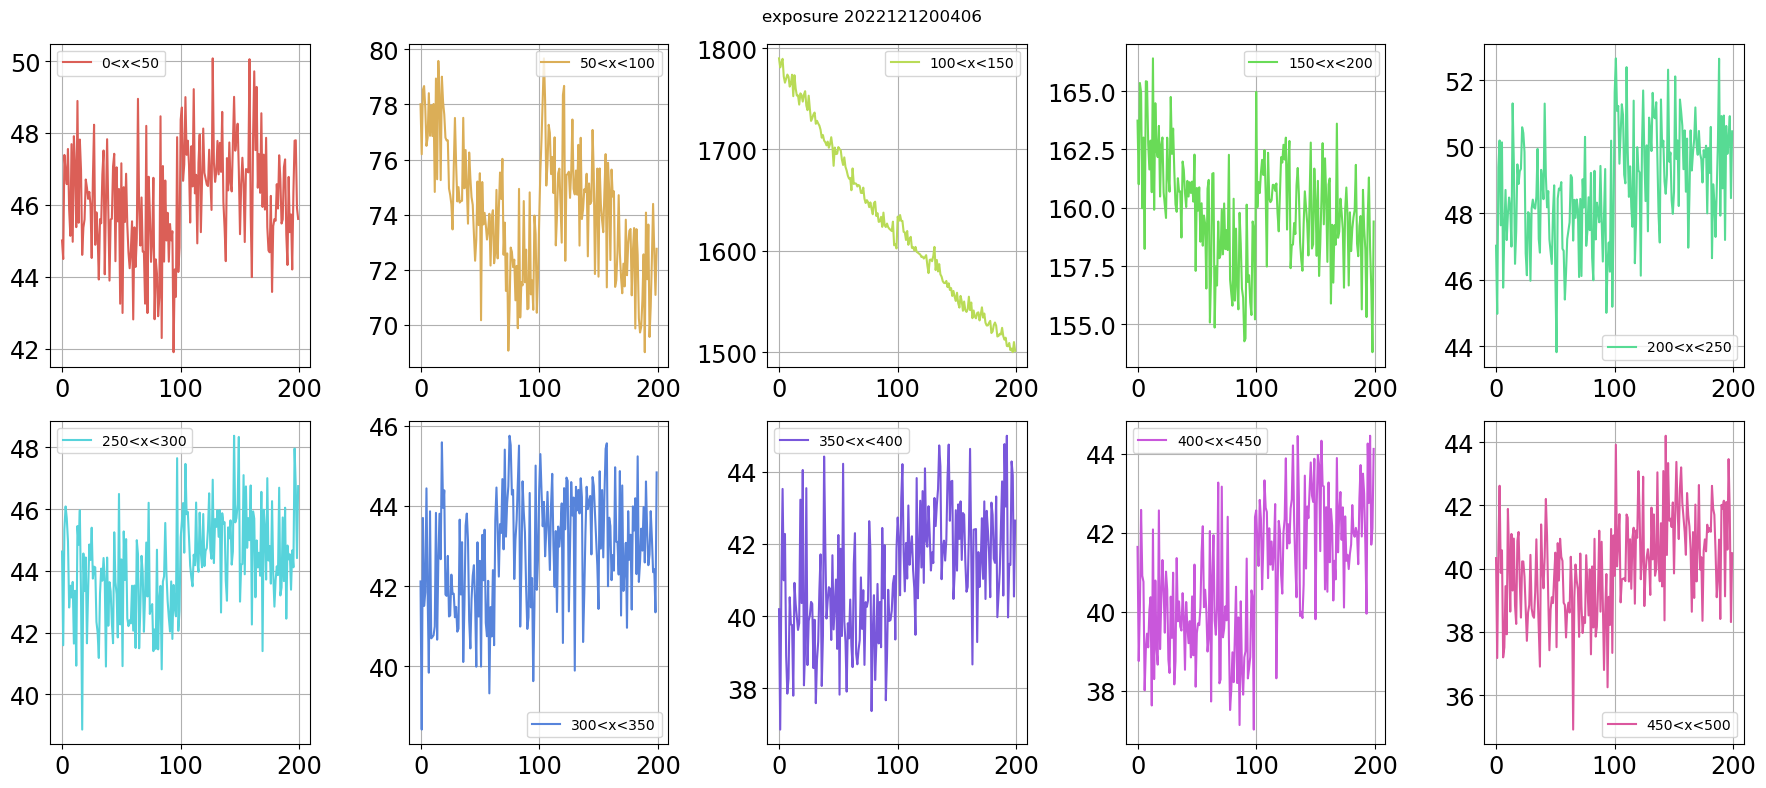

In [409]:
fig, axes = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 8))
for idx, ax in enumerate(axes.flat):
    if idx>nsteps:
        break
    xmin=idx*binwx
    xmax=(idx+1)*binwx
    label=f"{xmin}<x<{xmax}"    
    ax.plot(all_projections[idx],color=hls_colors[idx],label=label)
    ax.grid()
    ax.legend()
    
title = f"exposure {exposure_selected}"
plt.suptitle(title)
plt.tight_layout()